<h1 align="center">Appendix B</h1>
<h2 align="center">Impact of Demographic Factors on Final Grades</h2>
<h3 align="center">Name: Scott Hogan</h3>
<h4 align="center">Date: 6/24/2024</h4>

In [16]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import gridspec

math = pd.read_csv('student-mat.csv', delimiter=';')
language = pd.read_csv('student-por.csv', delimiter=';')

#### Tasks:

##### Investigate impact of demographic factors on final grades
##### Compare across subjects

In [ ]:
# Drop non-demographic columns
demo_math = math.drop(['school', 'address', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'romantic'], axis=1)
demo_language = language.drop(['school', 'address', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'romantic'], axis=1)

# Change 'Medu', 'Fedu', and 'health' columns into strings for label encoding
convert_type = {'Medu': str, 'Fedu': str, 'health': str}

demo_math = demo_math.astype(convert_type)
demo_language = demo_language.astype(convert_type)


# Encode labels
demo_math_dummies = pd.get_dummies(demo_math, drop_first=True, dtype=int)
demo_language_dummies = pd.get_dummies(demo_language, drop_first=True)


# G3 Response Variable
G3_math = math['G3']
G3_lang = language['G3']


MAT STUDENTS


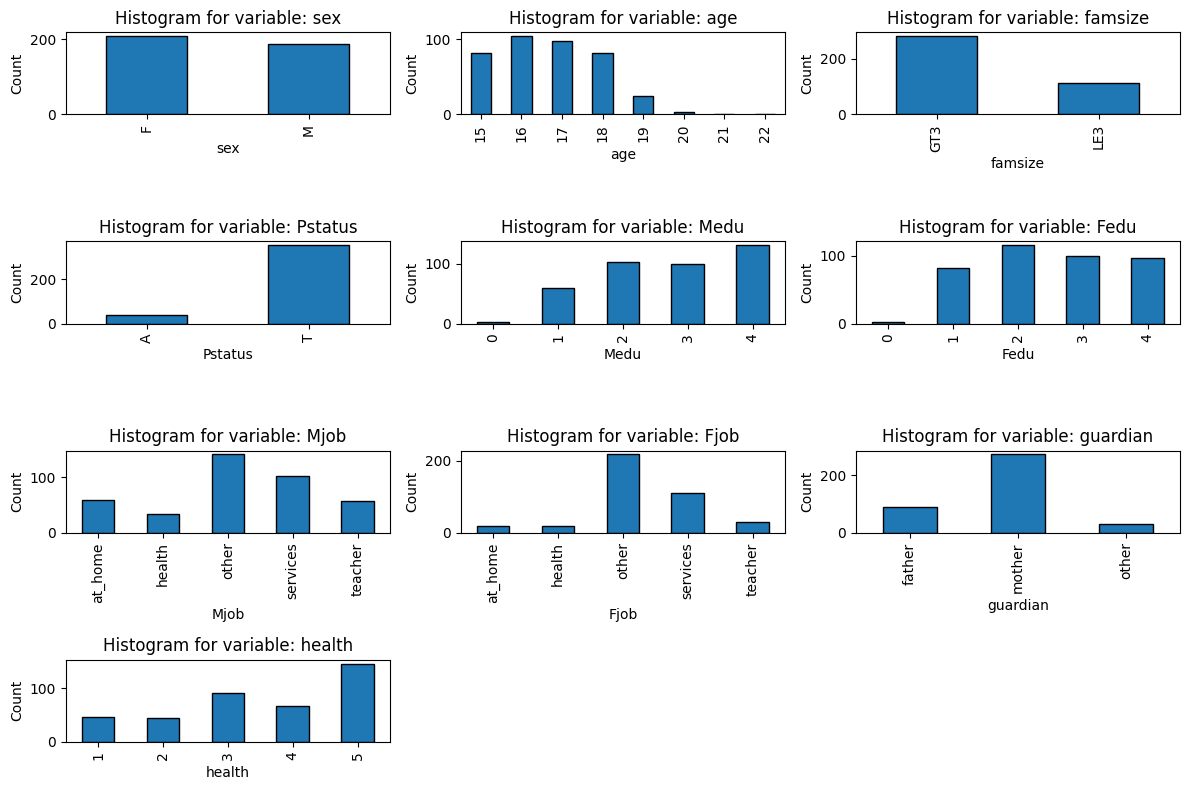

POR STUDENTS


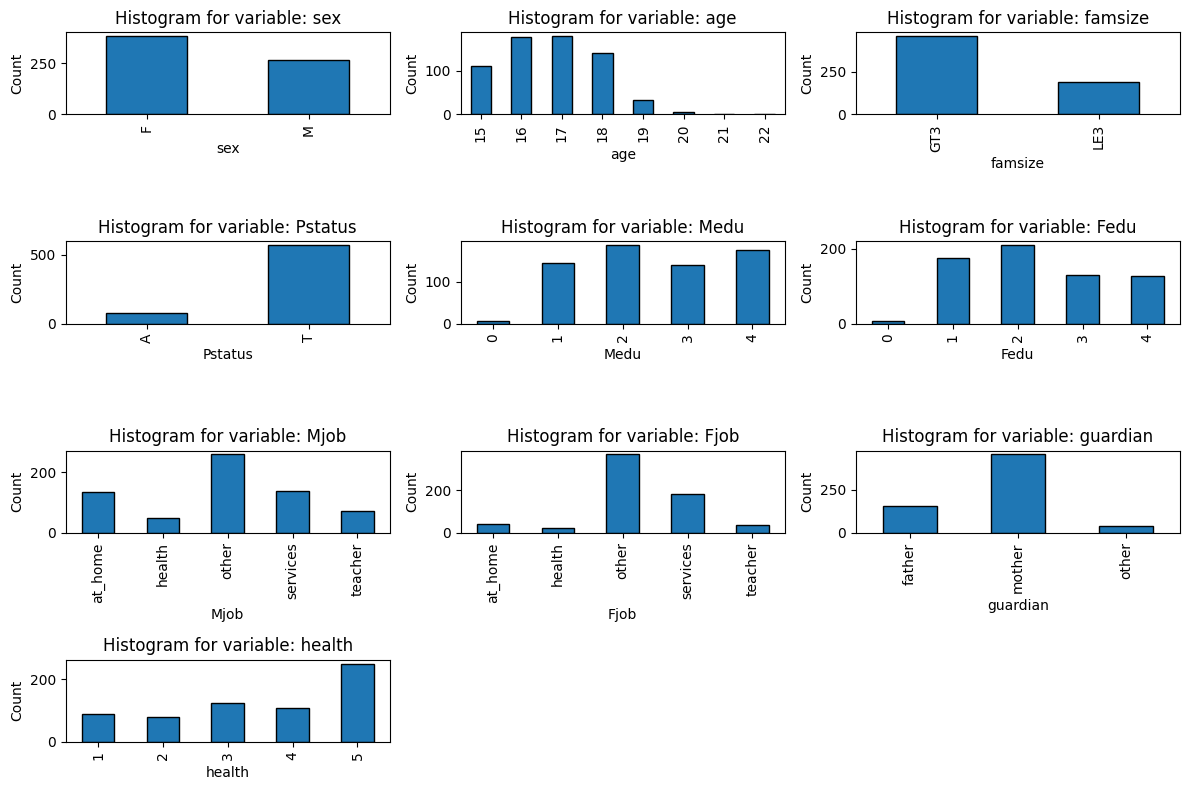

In [17]:

columns = demo_math.columns  # independent variables
n_plots = len(columns)
# Plot frequency distributions for each independent variable
def plot_variables(table):
    gs = gridspec.GridSpec(4, 3)
    fig = plt.figure(figsize=(12,8))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        table[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax, edgecolor='black')
        ax.set_xlabel(columns[i])
        ax.set_ylabel('Count')
        ax.set_title('Histogram for variable: ' + columns[i])
    fig.tight_layout()
    plt.show()
print('MAT STUDENTS')
plot_variables(demo_math)
print('POR STUDENTS')
plot_variables(demo_language)

In [23]:
# Reduce number of features using Recursive Feature Elimination (RFE) and fit linear regression for math class at Gabriel Pereira

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)
rfe = rfe.fit(demo_math_dummies, G3_math)

# Get the selected features
selected_features = demo_math_dummies.columns[rfe.support_]
print("Selected features:", selected_features)

# Fit the model again with selected features
X_selected = demo_math_dummies[selected_features]
X_selected = sm.add_constant(X_selected)
model_selected = sm.OLS(G3_math, X_selected).fit()
print(model_selected.summary())

Selected features: Index(['Fedu_1', 'Fedu_2'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.005
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00714
Time:                        13:29:34   Log-Likelihood:                -1156.2
No. Observations:                 395   AIC:                             2318.
Df Residuals:                     392   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [24]:
# Reduce number of features using Recursive Feature Elimination (RFE) and fit linear regression for langauge class at Gabriel Pereira

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe = rfe.fit(demo_language_dummies, G3_lang)

# Get the selected features
selected_features = demo_language_dummies.columns[rfe.support_]
print("Selected features:", selected_features)

# Fit the model again with selected features
X_selected = demo_language_dummies[selected_features]
X_selected = sm.add_constant(X_selected)
model_selected = sm.OLS(G3_lang, X_selected.astype(int)).fit()
print(model_selected.summary())

Selected features: Index(['sex_M', 'Medu_4', 'Fedu_1'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     20.55
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           9.98e-13
Time:                        13:29:38   Log-Likelihood:                -1651.8
No. Observations:                 649   AIC:                             3312.
Df Residuals:                     645   BIC:                             3330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [27]:
print(demo_math.columns)

Index(['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'health'],
      dtype='object')
